In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('datasets/Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
def linear_regressor(x, y):
    sum_x, sum_y = sum(x), sum(y)

    x_mean = sum_x / len(x)
    y_mean = sum_y / len(y)

    x_minus_x_mean = [val - x_mean for val in x]
    y_minus_y_mean = [val - y_mean for val in y]

    zip_li = zip(x_minus_x_mean, y_minus_y_mean)
    vals = [x * y for x, y in zip_li]

    b1 = sum(vals) / sum([x ** 2 for x in x_minus_x_mean])
    b0 = y_mean - b1 * x_mean

    return b0, b1


In [4]:
x = list(df['YearsExperience'])
y = list(df['Salary'])

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, shuffle=True)
b0, b1 = linear_regressor(x_train, y_train)
y_pred = [b0 + b1 * val for val in x_test]

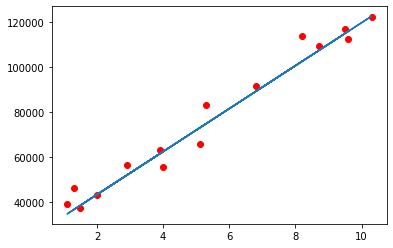

In [6]:
import matplotlib.pyplot as plt

plt.plot(x_test, y_pred)
plt.scatter(x_test, y_test, color='red')
plt.show()


In [7]:
from sklearn.metrics import mean_squared_error, r2_score

print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared: ', r2_score(y_test, y_pred))

RMSE:  5441.587415077257
R-squared:  0.9677944370099049
